<a href="https://colab.research.google.com/github/Sonushah7/CodSoft/blob/main/Credit%20Card%20Transactions%20Fraud%20Detection%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sonukumar07
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection


100%|██████████| 202M/202M [00:00<00:00, 774MB/s] 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [7]:
df=pd.read_csv("/content/fraud-detection/fraudTrain.csv")

In [8]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
df=df.drop(["Unnamed: 0","cc_num","first","last","city","state","zip","dob","trans_num","street","merch_lat","merch_long"], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   lat                    1296675 non-null  float64
 6   long                   1296675 non-null  float64
 7   city_pop               1296675 non-null  int64  
 8   job                    1296675 non-null  object 
 9   unix_time              1296675 non-null  int64  
 10  is_fraud               1296675 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 108.8+ MB


In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   lat                    1296675 non-null  float64       
 6   long                   1296675 non-null  float64       
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   unix_time              1296675 non-null  int64         
 10  is_fraud               1296675 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 108.8+ MB


None

In [13]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

display(df[['trans_date_trans_time', 'hour', 'day', 'month']].head())

,trans_date_trans_time,hour,day,month
0,2019-01-01 00:00:18,0,1,1
1,2019-01-01 00:00:44,0,1,1
2,2019-01-01 00:00:51,0,1,1
3,2019-01-01 00:01:16,0,1,1
4,2019-01-01 00:03:06,0,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   lat                    1296675 non-null  float64       
 6   long                   1296675 non-null  float64       
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   unix_time              1296675 non-null  int64         
 10  is_fraud               1296675 non-null  int64         
 11  hour                   1296675 non-null  int32         
 12  day                    12966

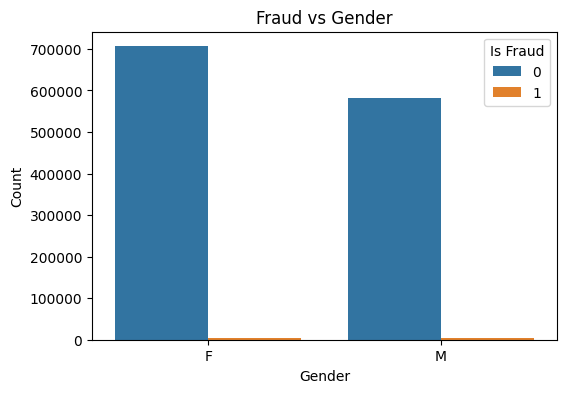

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title("Fraud vs Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

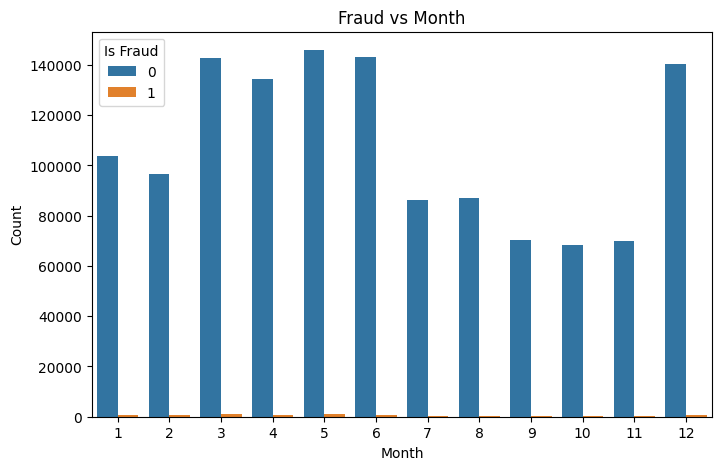

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='month', hue='is_fraud')
plt.title("Fraud vs Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


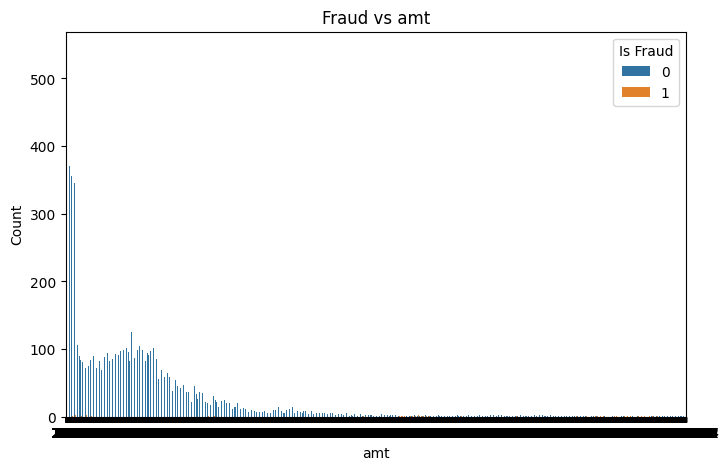

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='amt', hue='is_fraud')
plt.title("Fraud vs amt")
plt.xlabel("amt")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

In [18]:
df["merchant"].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [19]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00


In [20]:
import category_encoders as ce

# Define the target encoder
target_encoder = ce.TargetEncoder(cols=['merchant'])

# Fit and transform the 'merchant' column
df['merchant_encoded'] = target_encoder.fit_transform(df['merchant'], df['is_fraud'])

# Display the first few rows with the new column
display(df[['merchant', 'merchant_encoded', 'is_fraud']].head())

,merchant,merchant_encoded,is_fraud
0,"fraud_Rippin, Kub and Mann",0.014207,0
1,"fraud_Heller, Gutmann and Zieme",0.010787,0
2,fraud_Lind-Buckridge,0.002111,0
3,"fraud_Kutch, Hermiston and Farrell",0.003444,0
4,fraud_Keeling-Crist,0.003769,0


In [ ]:
# Define the target encoder for the remaining object columns
target_encoder_others = ce.TargetEncoder(cols=['category', 'gender', 'job'])

# Fit and transform the columns
df[['category_encoded', 'gender_encoded', 'job_encoded']] = target_encoder_others.fit_transform(df[['category', 'gender', 'job']], df['is_fraud'])

# Display the first few rows with the new columns
display(df[['category', 'category_encoded', 'gender', 'gender_encoded', 'job', 'job_encoded', 'is_fraud']].head())

In [22]:
df=df.drop(["merchant","category","gender","job"], axis=1)

In [ ]:
df=df.drop(["trans_date_trans_time"], axis=1)

In [24]:
df.head(2)

,amt,lat,long,city_pop,unix_time,is_fraud,hour,day,month,merchant_encoded,category_encoded,gender_encoded,job_encoded
0,4.97,36.0788,-81.1781,3495,1325376018,0,0,1,1,0.014207,0.014458,0.005262,0.001693
1,107.23,48.8878,-118.2105,149,1325376044,0,0,1,1,0.010787,0.014098,0.005262,0.002157


In [25]:
y_train=df["is_fraud"]

In [26]:
df=df.drop(["is_fraud"], axis=1)

In [27]:
x_train=df

In [28]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)